<center>
    
# Data Preprocessing and Cleaning
    
</center>

#### importing libraries

In [1]:
# importing libraries
import pandas as pd
import re
from langdetect import detect
from transformers import BertTokenizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

c:\Users\USER\anaconda3\envs\hashtag-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# viewing the data
data = pd.read_csv(".data/Twitter Data (Original).csv")
data.head()

,id,created,favoriteCount,isRetweet,retweetCount,retweeted,screenName,text,tashtag,Unnamed: 9
0,8.83E+17,07-06-2017 17:17,0.0,False,0.0,False,infocaptor,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#data,NaN
1,8.83E+17,07-06-2017 17:17,0.0,True,43.0,False,candle,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,#data,NaN
2,8.83E+17,07-06-2017 17:17,0.0,False,0.0,False,AwesomeEK,Looking Ahead: 17 #Predicted #Marketing #Trend...,#data,NaN
3,8.83E+17,07-06-2017 17:16,0.0,False,0.0,False,conney_island,Cambiar la rutina matutina ayuda a terminar co...,#data,NaN
4,8.83E+17,07-06-2017 17:16,0.0,True,1.0,False,blockchainreach,RT @simonnash2017: These are the #Top20 #BigDa...,#data,NaN


In [3]:
# dropping columns which are not required
data = data.drop(['id', 'created', 'favoriteCount', 'isRetweet', 'retweetCount', 'retweeted', 'screenName', 'tashtag', 'Unnamed: 9'], axis = 1)

In [4]:
# checking for null values present in the 'text' column
print("Number of null entries in the 'text' column: ", data['text'].isnull().sum(), '\n')

# reoving the null values
print('Removing null values from the column.......')
data = data.dropna(subset=['text'])
print("Number of null entries in the 'text' column: ", data['text'].isnull().sum())
data['text'].isnull().sum()

Number of null entries in the 'text' column:  6 

Removing null values from the column.......
Number of null entries in the 'text' column:  0


np.int64(0)

#### removing URLs from the posts

In [5]:
# removing the urls
def remove_urls(text):
    '''function to remove urls from the posts'''
    return re.sub(r'http\S+', '', text)

In [6]:
# creating a column which gives the posts without the urls
data['removed_https'] = data['text'].apply(remove_urls)
data.head()

,text,removed_https
0,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#API - #Data #Sourcing\r\n
1,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,RT @PitchCrunch: Before Powerpoint @NASA 1961\...
2,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...
3,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...
4,RT @simonnash2017: These are the #Top20 #BigDa...,RT @simonnash2017: These are the #Top20 #BigDa...


#### removing retweets from the posts

In [7]:
# removing retweets and the account whose post was retweeted
def remove_retweets(text):
    '''function to remove retweets and the account whose post was retweeted'''
    # Define a regular expression pattern to match retweets
    pattern = r'^RT @\w+:'
    return re.sub(pattern, '', text)

In [8]:
# creating a column to get the posts with no retweets mentioned
data['removed_retweets'] = data['removed_https'].apply(remove_retweets)
data.head()

,text,removed_https,removed_retweets
0,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#API - #Data #Sourcing\r\n,#API - #Data #Sourcing\r\n
1,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,Before Powerpoint @NASA 1961\r\n\r\n#AI #star...
2,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...
3,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...
4,RT @simonnash2017: These are the #Top20 #BigDa...,RT @simonnash2017: These are the #Top20 #BigDa...,These are the #Top20 #BigData &amp; #AI on #t...


#### extracting hashtags

In [9]:
# Extract hashtags
data['Hashtags'] = data['removed_retweets'].apply(lambda x: ' '.join(re.findall(r'#\w+', x)))
# Remove hashtags from text
data['text_without_hashtags'] = data['removed_retweets'].apply(lambda x: re.sub(r'#', '', x))
data.head()

,text,removed_https,removed_retweets,Hashtags,text_without_hashtags
0,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#API - #Data #Sourcing\r\n,#API - #Data #Sourcing\r\n,#API #Data #Sourcing,API - Data Sourcing\r\n
1,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,Before Powerpoint @NASA 1961\r\n\r\n#AI #star...,#AI #startup #tech #IoT #data #stocks #code #g...,Before Powerpoint @NASA 1961\r\n\r\nAI startu...
2,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,#Predicted #Marketing #Trends #Mobile #AR #VR ...,Looking Ahead: 17 Predicted Marketing Trends I...
3,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,#Data,Cambiar la rutina matutina ayuda a terminar co...
4,RT @simonnash2017: These are the #Top20 #BigDa...,RT @simonnash2017: These are the #Top20 #BigDa...,These are the #Top20 #BigData &amp; #AI on #t...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,These are the Top20 BigData &amp; AI on twitt...


#### extracting mentions

In [10]:
# extracting mentioned accounts in the posts
def extract_mentions(text):
    '''function to extract mentioned accounts in the posts'''
    # Use regular expressions to find mentions
    mentions = re.findall(r'@(\w+)', text)
    # Remove "@" sign from the original text
    cleaned_text = re.sub(r'@', '', text)
    return mentions, cleaned_text

In [11]:
# Define a function to convert a list into a string
def list_to_string(input_list):
    '''funciton to unlist a list and join them using ','.'''
    return ', '.join(input_list)

# function to remove leading spaces from a sentence
def remove_leading_spaces(text):
    return text.lstrip()

In [12]:
# creating columns to store the mentioned accounts and text with no mentions
data['Mentioned_Accounts'], data['Text_No_Mentions'] = zip(*data['text_without_hashtags'].apply(extract_mentions))

# Apply the function to a specific column in the DataFrame
data['Mentioned_Accounts'] = data['Mentioned_Accounts'].apply(list_to_string)

# removing lead spaces
data['Text_No_Mentions'] = data['Text_No_Mentions'].apply(remove_leading_spaces)

data.head()

,text,removed_https,removed_retweets,Hashtags,text_without_hashtags,Mentioned_Accounts,Text_No_Mentions
0,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#API - #Data #Sourcing\r\n,#API - #Data #Sourcing\r\n,#API #Data #Sourcing,API - Data Sourcing\r\n,,API - Data Sourcing\r\n
1,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,Before Powerpoint @NASA 1961\r\n\r\n#AI #star...,#AI #startup #tech #IoT #data #stocks #code #g...,Before Powerpoint @NASA 1961\r\n\r\nAI startu...,NASA,Before Powerpoint NASA 1961\r\n\r\nAI startup ...
2,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,#Predicted #Marketing #Trends #Mobile #AR #VR ...,Looking Ahead: 17 Predicted Marketing Trends I...,,Looking Ahead: 17 Predicted Marketing Trends I...
3,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,#Data,Cambiar la rutina matutina ayuda a terminar co...,LANACION,Cambiar la rutina matutina ayuda a terminar co...
4,RT @simonnash2017: These are the #Top20 #BigDa...,RT @simonnash2017: These are the #Top20 #BigDa...,These are the #Top20 #BigData &amp; #AI on #t...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,These are the Top20 BigData &amp; AI on twitt...,,These are the Top20 BigData &amp; AI on twitte...


#### detecting the language of the posts

In [13]:
def detect_language(text):
    '''Function to detect the language of a text'''
    try:
        return detect(text)
    except:
        # If language detection fails, return 'unknown'
        return 'unknown'

In [14]:
# creating a column for the language detected
data['language'] = data['Text_No_Mentions'].apply(detect_language)
data.head()

,text,removed_https,removed_retweets,Hashtags,text_without_hashtags,Mentioned_Accounts,Text_No_Mentions,language
0,#API - #Data #Sourcing\r\nhttps://t.co/5YO2s1D...,#API - #Data #Sourcing\r\n,#API - #Data #Sourcing\r\n,#API #Data #Sourcing,API - Data Sourcing\r\n,,API - Data Sourcing\r\n,en
1,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,RT @PitchCrunch: Before Powerpoint @NASA 1961\...,Before Powerpoint @NASA 1961\r\n\r\n#AI #star...,#AI #startup #tech #IoT #data #stocks #code #g...,Before Powerpoint @NASA 1961\r\n\r\nAI startu...,NASA,Before Powerpoint NASA 1961\r\n\r\nAI startup ...,en
2,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 #Predicted #Marketing #Trend...,#Predicted #Marketing #Trends #Mobile #AR #VR ...,Looking Ahead: 17 Predicted Marketing Trends I...,,Looking Ahead: 17 Predicted Marketing Trends I...,en
3,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,Cambiar la rutina matutina ayuda a terminar co...,#Data,Cambiar la rutina matutina ayuda a terminar co...,LANACION,Cambiar la rutina matutina ayuda a terminar co...,es
4,RT @simonnash2017: These are the #Top20 #BigDa...,RT @simonnash2017: These are the #Top20 #BigDa...,These are the #Top20 #BigData &amp; #AI on #t...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,These are the Top20 BigData &amp; AI on twitt...,,These are the Top20 BigData &amp; AI on twitte...,en


In [15]:
# filtering for only English posts
english_posts = data[data['language'] == 'en']

# getting the required columns from the dataframe
english_posts1 = english_posts[['text','Text_No_Mentions','Hashtags']]

In [16]:
# renaming columns
english_posts1.rename(columns = {'text':'Post', 'Text_No_Mentions' : 'Text'}, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_14756\1393960996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_posts1.rename(columns = {'text':'Post', 'Text_No_Mentions' : 'Text'}, inplace = True)


#### creating csv files for the cleaned data 

In [17]:
# data containing all the columns but with posts in english language
english_posts.to_csv(".preprocessed_data/Twitter Data (English).csv", index=False, encoding="utf-8")

# data containing the required columns and posts in english language
english_posts1.to_csv(".preprocessed_data/Twitter Data (Cleaned).csv", index=False, encoding="utf-8")

#### preprocessing

In [18]:
# Initialize an empty list to hold the data
data = []
column_names = None 

# Open the CSV file and read each line
with open(".preprocessed_data/Twitter Data (Cleaned).csv", 'r', encoding='utf-8') as file:
    for line in file:
        # Attempt to split the line into fields
        fields = line.strip().split(',')
        if column_names is None:
            # If column names are not set, use the first row as column names
            column_names = fields
        # Check if the number of fields in the line is as expected (e.g., 3)
        else:
            if len(fields) == 3:
                data.append(fields)
            else:
                # Handle the line with an unexpected number of fields, e.g., skip it
                print(f"Skipped line with {len(fields)} fields: {line}")

# Create a DataFrame from the collected data
tweets = pd.DataFrame(data, columns=column_names)

Skipped line with 1 fields: "#API - #Data #Sourcing

Skipped line with 2 fields: https://t.co/5YO2s1D4vq https://t.co/O9IsY7pqVF","API - Data Sourcing

Skipped line with 2 fields:  ",#API #Data #Sourcing

Skipped line with 1 fields: "RT @PitchCrunch: Before Powerpoint @NASA 1961

Skipped line with 1 fields: 

Skipped line with 2 fields: #AI #startup #tech #IoT #data #stocks #code #gamedev #VentureCapital #gaming #Python #bitcoi…","Before Powerpoint NASA 1961

Skipped line with 1 fields: 

Skipped line with 2 fields: AI startup tech IoT data stocks code gamedev VentureCapital gaming Python bitcoi…",#AI #startup #tech #IoT #data #stocks #code #gamedev #VentureCapital #gaming #Python #bitcoi

Skipped line with 5 fields: "RT @MSCloud: Using #Azure, @IOInteractive collects and analyzes telemetry #data from live gameplay. Read: https://t.co/kAJxPFZyec https://t…","Using Azure, IOInteractive collects and analyzes telemetry data from live gameplay. Read:  ",#Azure #data

Skipped line with 5 fi

In [19]:
# Remove Duplicates
tweets= tweets.drop_duplicates(subset="Post")

In [20]:
#Handle missing Values
tweets = tweets.dropna()

In [21]:
from dotenv import load_dotenv
import os

load_dotenv()
token = os.getenv("huggingFace_token")

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", token=token)

In [22]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'[^a-zA-Z0-9\s]','',text)
    return text

def clean_hashtags(hashtags_list):
    cleaned_tags_list = []
    for hashtags_str in hashtags_list:
        cleaned_tags = []
        for tag in hashtags_str.split('#'):
            if tag.strip() != '':
                cleaned_tags.append(tag.strip())
        cleaned_tags_list.append(cleaned_tags)
    return cleaned_tags_list

In [23]:
tweets['Clean_Text'] = tweets['Text'].apply(clean_text)
tweets['Cleaned_Hashtags'] = clean_hashtags(tweets['Hashtags'])

In [24]:
tweets.head()

,Post,Text,Hashtags,Clean_Text,Cleaned_Hashtags
0,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 Predicted Marketing Trends I...,#Predicted #Marketing #Trends #Mobile #AR #VR ...,looking ahead 17 predicted marketing trends in...,"[Predicted, Marketing, Trends, Mobile, AR, VR,..."
1,RT @simonnash2017: These are the #Top20 #BigDa...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da..."
2,These are the #Top20 #BigData &amp; #AI on #tw...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da..."
3,RT @Azure: Data is evolving. Find out how to t...,Data is evolving. Find out how to transform yo...,#SQL #Data,data is evolving find out how to transform you...,"[SQL, Data]"
4,These are the #Top20 #BigData &amp; #AI on #tw...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da..."


In [25]:
# Tokenize the text and hashtags
tweets['text_tokens'] = tweets['Text'].apply(lambda text: tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=128))
tweets['hashtags_tokens'] = tweets['Hashtags'].apply(lambda hashtags: [tokenizer.encode(tag, add_special_tokens=False) for tag in hashtags])

In [26]:
# Combine text and hashtags tokens
tweets['input_tokens'] = tweets.apply(lambda row: row['text_tokens'] + [tokenizer.sep_token_id] + [token for tag_tokens in row['hashtags_tokens'] for token in tag_tokens], axis=1)

In [27]:
# removing null values
tweets.dropna()

,Post,Text,Hashtags,Clean_Text,Cleaned_Hashtags,text_tokens,hashtags_tokens,input_tokens
0,Looking Ahead: 17 #Predicted #Marketing #Trend...,Looking Ahead: 17 Predicted Marketing Trends I...,#Predicted #Marketing #Trends #Mobile #AR #VR ...,looking ahead 17 predicted marketing trends in...,"[Predicted, Marketing, Trends, Mobile, AR, VR,...","[101, 2559, 3805, 1024, 2459, 10173, 5821, 128...","[[1001], [1052], [1054], [1041], [1040], [1045...","[101, 2559, 3805, 1024, 2459, 10173, 5821, 128..."
1,RT @simonnash2017: These are the #Top20 #BigDa...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285...","[[1001], [1056], [1051], [1052], [1016], [1014...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285..."
2,These are the #Top20 #BigData &amp; #AI on #tw...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285...","[[1001], [1056], [1051], [1052], [1016], [1014...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285..."
3,RT @Azure: Data is evolving. Find out how to t...,Data is evolving. Find out how to transform yo...,#SQL #Data,data is evolving find out how to transform you...,"[SQL, Data]","[101, 2951, 2003, 20607, 1012, 2424, 2041, 212...","[[1001], [1055], [1053], [1048], [], [1001], [...","[101, 2951, 2003, 20607, 1012, 2424, 2041, 212..."
4,These are the #Top20 #BigData &amp; #AI on #tw...,These are the Top20 BigData &amp; AI on twitte...,#Top20 #BigData #AI #twitter #2017 #ITjobs #Da...,these are the top20 bigdata amp ai on twitter ...,"[Top20, BigData, AI, twitter, 2017, ITjobs, Da...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285...","[[1001], [1056], [1051], [1052], [1016], [1014...","[101, 2122, 2024, 1996, 2327, 11387, 2502, 285..."
...,...,...,...,...,...,...,...,...
1291,RT @turinginst: Apply: We're hosting an Urban ...,Apply: We're hosting an Urban Analytics DataDi...,#DataDive #datascience,apply were hosting an urban analytics datadive...,"[DataDive, datascience]","[101, 6611, 1024, 2057, 1005, 2128, 9936, 2019...","[[1001], [1040], [1037], [1056], [1037], [1040...","[101, 6611, 1024, 2057, 1005, 2128, 9936, 2019..."
1294,binaryloom: RT reach2ratan: What is #Bigdata? ...,binaryloom: RT reach2ratan: What is Bigdata? ...,#Bigdata #datascience #analytics #makeyourownl...,binaryloom rt reach2ratan what is bigdata dat...,"[Bigdata, datascience, analytics, makeyourownl...","[101, 12441, 4135, 5358, 1024, 19387, 3362, 24...","[[1001], [1038], [1045], [1043], [1040], [1037...","[101, 12441, 4135, 5358, 1024, 19387, 3362, 24..."
1298,10 Rules for Creating Reproducible Results in ...,10 Rules for Creating Reproducible Results in ...,#DataScience,10 rules for creating reproducible results in ...,[DataScience],"[101, 2184, 3513, 2005, 4526, 16360, 14127, 21...","[[1001], [1040], [1037], [1056], [1037], [1055...","[101, 2184, 3513, 2005, 4526, 16360, 14127, 21..."
1311,RT @dj_shaily: @gp_pulipaka: Deep Reinforcemen...,gp_pulipaka: Deep Reinforcement Learning For S...,#BigData #DeepLearning #MachineLearning #DataS...,gppulipaka deep reinforcement learning for soc...,"[BigData, DeepLearning, MachineLearning, DataS...","[101, 14246, 1035, 16405, 15000, 11905, 1024, ...","[[1001], [1038], [1045], [1043], [1040], [1037...","[101, 14246, 1035, 16405, 15000, 11905, 1024, ..."


#### visualizations

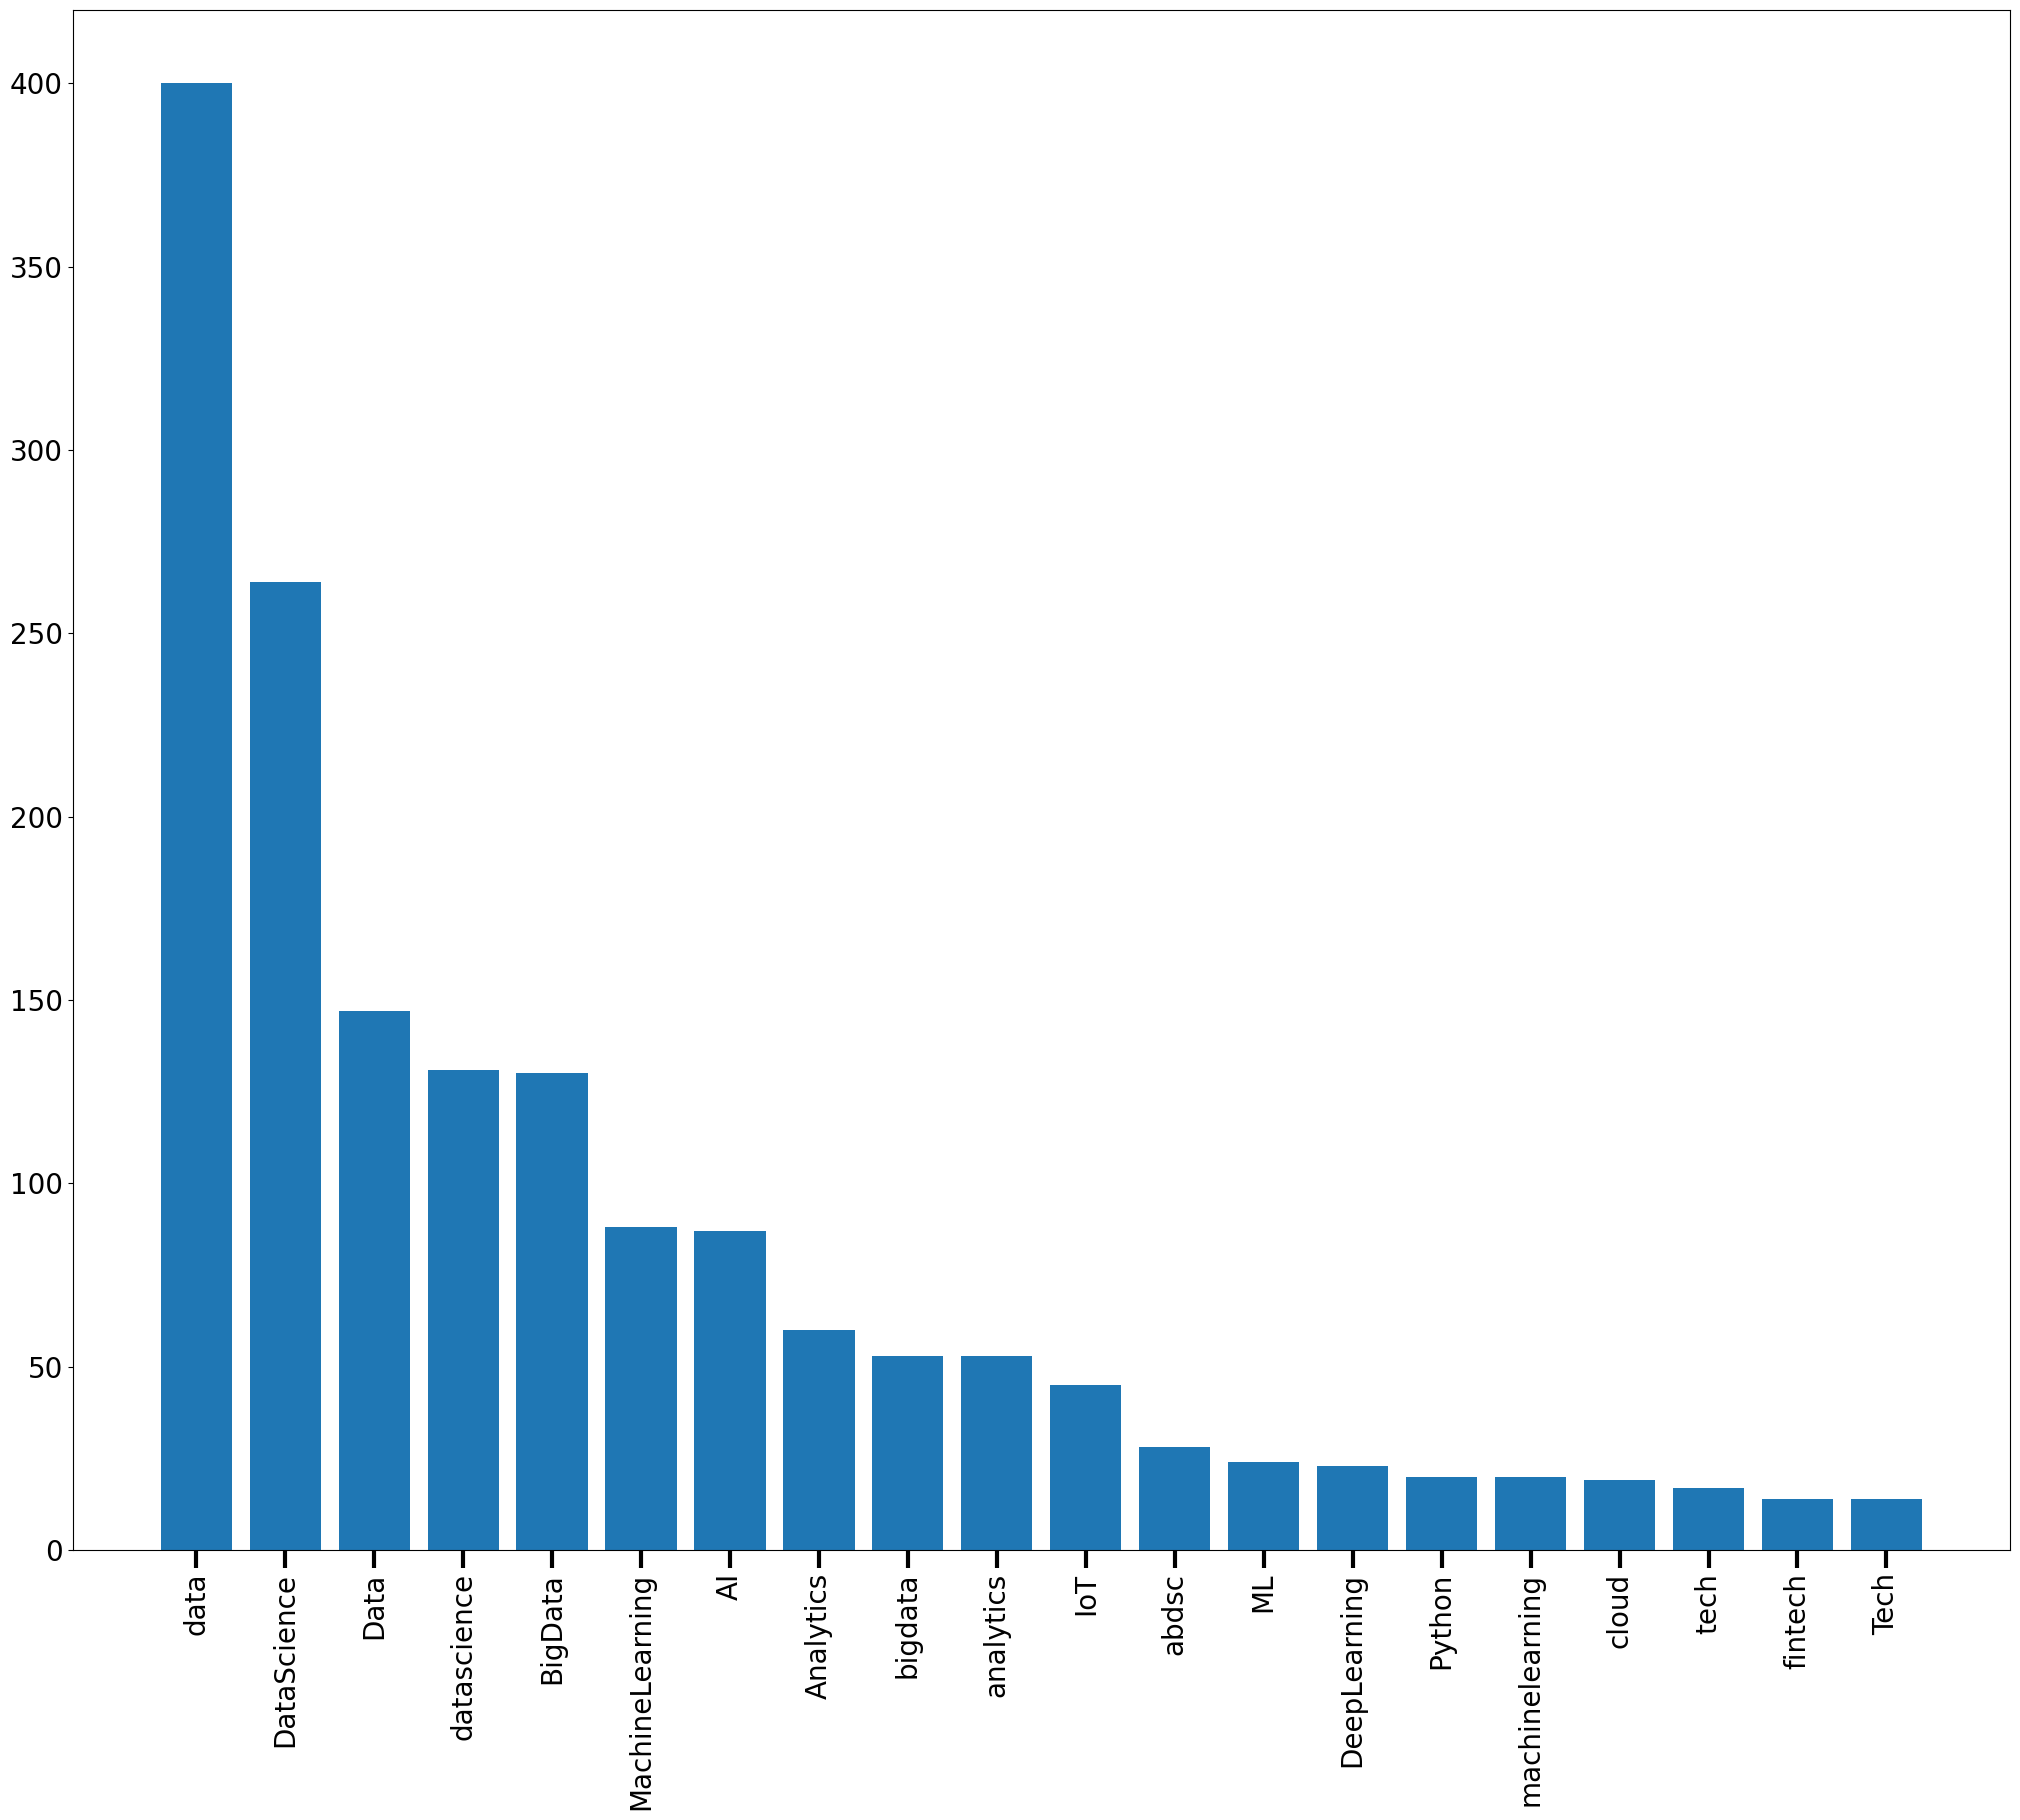

In [28]:
# list for storing cleaned hashtags
cleaned_tags = []

# storing the tags
for cleaned_tag in tweets['Cleaned_Hashtags']:
    for tag in cleaned_tag:
        cleaned_tags.append(tag)
        
# finding the count of the tags
nWords = Counter(cleaned_tags)

# sorting the dictionary
sort_word = sorted(nWords.items(), key=lambda x:x[1], reverse=True)
sort_word = dict(sort_word)

# setting the bar plot
plt.rcParams.update({'font.size': 20})
words = list(sort_word.keys())[:20]
count = list(sort_word.values())[:20]
plt.figure(figsize=(25,20))
plt.bar(range(20), count, tick_label=words)
plt.tick_params(axis='x', direction='out', length=13, width=3, rotation=90)
plt.show()

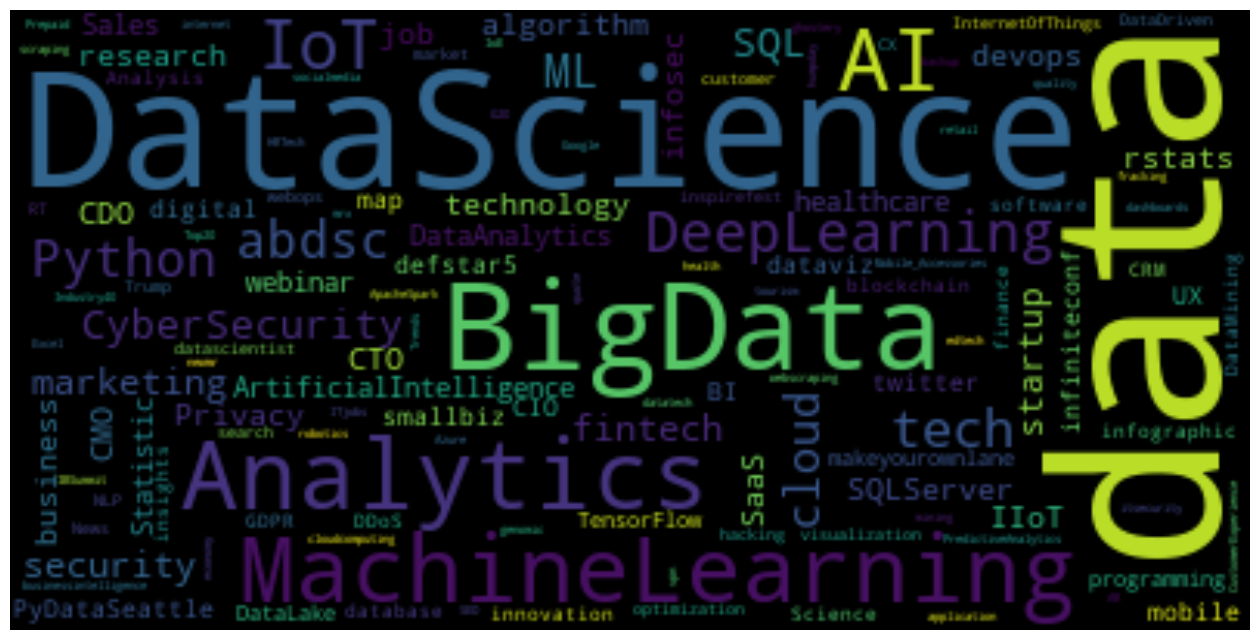

In [29]:
# text for creating a word cloud
text = ' '.join(cleaned_tags)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(16,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

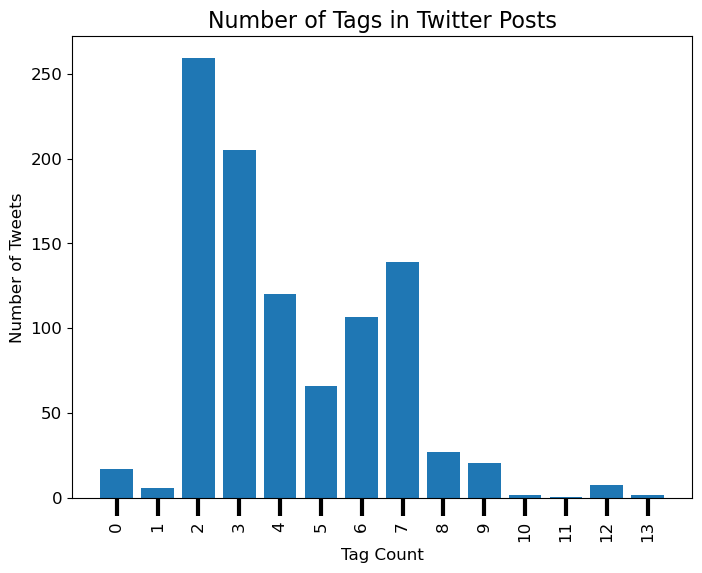

In [30]:
# function to count the number of tags in each tweet post
def count(tag_list):
    return len(tag_list)

# creating a column showing the number of tags in corresponding post and changing dtype
tweets['numTags'] = tweets['Cleaned_Hashtags'].apply(lambda word: count(word))
tweets['numTags'] = tweets['numTags'].astype(str) 

# finding the count of the tags
nWords = Counter(tweets['numTags'])

# setting the bar plot
plt.rcParams.update({'font.size': 12})
words = list(nWords.keys())[:20]
l2 = [int(x) for x in words]
plt.figure(figsize=(8,6))
plt.bar(range(14), nWords.values(), tick_label=sorted(l2))
plt.title('Number of Tags in Twitter Posts', fontsize=16)
plt.xlabel('Tag Count')
plt.ylabel('Number of Tweets')
plt.tick_params(axis='x', direction='out', length=13, width=3, rotation=90)
plt.show()

#### creating preprocessed tweets excel file

In [31]:
tweets.drop(['numTags'], axis = 1)
tweets.to_excel('.preprocessed_data/preprocessed_tweets.xlsx',index = False)